# <center>***SENTIMENT ANALYSIS ON TWITTER DATA***</center>

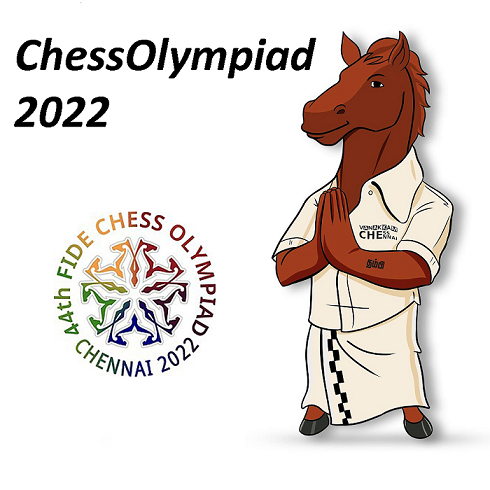

## Importing required libraries

In [405]:
#Libarary for Data scrapping
import snscrape.modules.twitter as sntwitter

#Libraries for EDA
import pandas as pd
import numpy as np
import collections

#Libraries for Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

#library for text pre-processing
import string
string.punctuation
import re
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams
import datetime as dt
from datetime import date
import calendar

# Library for Translation
import translators as ts

# Libraries for Sentiment Analysis
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from scipy.special import softmax
import torch
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis

## Data collection

### Data acquisition from Twitter

In [269]:
query = "ChessOlympiad2022"

limit = 1000
tweets = []
        
    
#id = [], date = [], content = [], user = [], replyCount=[], retweetCount=[], likeCount=[], quoteCount=[], retweetedTweet=[], lang=[], sourceLabel=[], media=[], mentionedUsers=[], place=[], hashtags=[]

pd.options.display.max_colwidth = 280   # Maximum characters in Twitter
for tweet in sntwitter.TwitterSearchScraper(query).get_items():
    if len(tweets) != limit:
        tweets.append([tweet.id, tweet.date, tweet.content, tweet.user, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.retweetedTweet, tweet.lang, tweet.sourceLabel, tweet.media, tweet.mentionedUsers, tweet.place, tweet.hashtags])
    else:
        break
    
df = pd.DataFrame(tweets, columns=['id', 'date', 'content', 'user', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount', 'retweetedTweet', 'lang', 'sourceLabel', 'media', 'mentionedUsers', 'place', 'hashtags'])

In [270]:
df_copy = df.copy()

In [271]:
df.head()

,id,date,content,user,replyCount,retweetCount,likeCount,quoteCount,retweetedTweet,lang,sourceLabel,media,mentionedUsers,place,hashtags
0,1559227901706485760,2022-08-15 17:17:55+00:00,"@JaimeHidalgoA @wither1971 @MarticaFierro @amanecegallito @pamozaec LA MENTIRA ES OLÍMPICA. Aquí documento que firma Heredia con vto.bno afirmando ser Santa, pero a la vez líder del Club de Papel o ilegal que conjunto al Ministro enviaron a dedo deportistas al #ChessOlympiad2...",https://twitter.com/DaniCevallosF,0,1,0,0,None,es,Twitter for Android,"[Photo(previewUrl='https://pbs.twimg.com/media/FaN9gv3WIAQ7b89?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FaN9gv3WIAQ7b89?format=jpg&name=large')]","[https://twitter.com/JaimeHidalgoA, https://twitter.com/wither1971, https://twitter.com/MarticaFierro, https://twitter.com/amanecegallito, https://twitter.com/pamozaec]",None,[ChessOlympiad2022]
1,1559224756301606912,2022-08-15 17:05:25+00:00,@ZelenskyyUa Hey! did you thank our PM Mr. NarendraModi 🇮🇳 for safeguarding Ukraines in India and too sending them with Gold 🏅 Medal. Our Chief minister of State Mr. Stalin @mkstalin also did a fantastic role in #ChessOlympiad2022,https://twitter.com/joferts,3,0,1,0,None,en,Twitter for iPhone,None,"[https://twitter.com/ZelenskyyUa, https://twitter.com/mkstalin]",None,[ChessOlympiad2022]
2,1559224247033409536,2022-08-15 17:03:24+00:00,@ZelenskyyUa @mohamedbazoum hai did you thank our PM Mr. NarendraModi 🇮🇳 for safeguarding Ukraines in India and too sending them with Gold 🏅 Medal. Our Chief minister of State Mr. Stalin @mkstalin also did a fantastic role in #ChessOlympiad2022,https://twitter.com/joferts,0,0,0,0,None,en,Twitter for iPhone,None,"[https://twitter.com/ZelenskyyUa, https://twitter.com/mohamedbazoum, https://twitter.com/mkstalin]",None,[ChessOlympiad2022]
3,1559222649007783936,2022-08-15 16:57:03+00:00,Life and Chess is all about finding the best moves over good moves.\n#ChessOlympiad2022 #chess .,https://twitter.com/_itsSSP_,0,1,0,0,None,en,Twitter for Android,None,None,None,"[ChessOlympiad2022, chess]"
4,1559220339116167168,2022-08-15 16:47:52+00:00,FULL VIDEO LINK 👇\nhttps://t.co/SmPrtPjWsc\n\n#ChessOlympiad2022 #ChennaiChess2022 \n#chesschennai2022 #chesschennai2022 \n#olympiad2022 #chess #GalattaExclusive,https://twitter.com/galattadotcom,0,0,3,0,None,en,Twitter Web App,None,None,None,"[ChessOlympiad2022, ChennaiChess2022, chesschennai2022, chesschennai2022, olympiad2022, chess, GalattaExclusive]"


## Understanding the data

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              1000 non-null   int64              
 1   date            1000 non-null   datetime64[ns, UTC]
 2   content         1000 non-null   object             
 3   user            1000 non-null   object             
 4   replyCount      1000 non-null   int64              
 5   retweetCount    1000 non-null   int64              
 6   likeCount       1000 non-null   int64              
 7   quoteCount      1000 non-null   int64              
 8   retweetedTweet  0 non-null      object             
 9   lang            1000 non-null   object             
 10  sourceLabel     1000 non-null   object             
 11  media           541 non-null    object             
 12  mentionedUsers  454 non-null    object             
 13  place           45 non-null     ob

The data has 1000 records and 15 columns of integer and object data type

### Number of numeric and character columns 

In [273]:
numeric_column = df.select_dtypes(include=['int64']).columns
character_column = df.select_dtypes(include=['object']).columns
print("Numeric column : ", len(numeric_column), numeric_column)
print("Character column : ", len(character_column), character_column)
print("Date Time column : ", 'date')

Numeric column :  5 Index(['id', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount'], dtype='object')
Character column :  9 Index(['content', 'user', 'retweetedTweet', 'lang', 'sourceLabel', 'media',
       'mentionedUsers', 'place', 'hashtags'],
      dtype='object')
Date Time column :  date


### Descriptive statistics

In [274]:
df.describe()

,id,replyCount,retweetCount,likeCount,quoteCount
count,1.000000e+03,1000.000000,1000.00000,1000.00000,1000.000000
mean,1.557692e+18,1.061000,5.88800,56.82200,0.277000
std,4.867669e+14,12.592214,30.74099,323.99405,2.607503
min,1.557255e+18,0.000000,0.00000,0.00000,0.000000
25%,1.557321e+18,0.000000,0.00000,0.00000,0.000000
50%,1.557541e+18,0.000000,0.00000,2.00000,0.000000
75%,1.557970e+18,0.000000,2.00000,9.00000,0.000000
max,1.559228e+18,389.000000,642.00000,5880.00000,77.000000


## Duplicate rows

In [275]:
duplicated = df.loc[:, df.columns!='user']
duplicated.loc[duplicated.astype(str).duplicated(keep=False)]

,id,date,content,replyCount,retweetCount,likeCount,quoteCount,retweetedTweet,lang,sourceLabel,media,mentionedUsers,place,hashtags


The dataframe has no duplicate rows

# Data cleaning

## Null values and it's percentage

In [276]:
null_values = pd.DataFrame({'Column':df.columns, 'Null_values': df.isnull().sum().values, 'Percentage':df.isnull().sum().values/len(df)*100})
null_values

,Column,Null_values,Percentage
0,id,0,0.0
1,date,0,0.0
2,content,0,0.0
3,user,0,0.0
4,replyCount,0,0.0
5,retweetCount,0,0.0
6,likeCount,0,0.0
7,quoteCount,0,0.0
8,retweetedTweet,1000,100.0
9,lang,0,0.0


The above data frame shows that retweetedTweet has 100% null values, media has 45.9% null values, mentionedUsers has 54.6% null values, place has 95.5 null values and hashtags has 10.6% null values

### Handling missing values

Dropping columns which has more than 30% null values ie) retweetedTweet, media, mentionedUsers, place

In [277]:
cols_to_drop = null_values.loc[null_values['Percentage']>30, 'Column'].values
df.drop(cols_to_drop, axis=1, inplace=True)

Handling missing values in 'Hashtags' column which has 10.3% of missing values

In [278]:
hash_tag_dict = {}
hash_tag_list = []

for i in df['hashtags'].value_counts().index:
    for j in i:
        hash_tag_list.append(j)
    
for word in hash_tag_list:
    if word not in hash_tag_dict.keys():
        hash_tag_dict[word]=1
    else:
        hash_tag_dict[word]+=1
        
sorted_x = sorted(hash_tag_dict.items(), key=lambda kv: kv[1], reverse=True)
sorted_dict = collections.OrderedDict(sorted_x)
max(zip(sorted_dict.values(), sorted_dict.keys()))

(436, 'ChessOlympiad2022')

We can see that 'ChessOlympiad2022' is used 436 times among the hashtags, so we can use the same to replace the missing values

In [279]:
df['hashtags'] = df['hashtags'].fillna('ChessOlympiad2022')

In [280]:
df.isnull().sum().max() # checking that there is no null data

0

## Text preprocessing

Finding mentions in each tweet and adding it to a separate column for Analysis

In [281]:
df['mentions']=df['content'].apply(lambda x:re.findall(r'\@\w+', x))
df['mentions'] = df['mentions'].apply(lambda x: np.NaN if x == [] else x)

Removing new lines from each tweet to reduce space

In [282]:
df['content'] = df['content'].apply(lambda x: x.replace('\n', ' ').strip())

Iterating through each non-english content and converting it to English content using Translator library 

### Identifying unique languages

In [287]:
print(df['lang'].unique())
print(df['lang'].nunique())

['es' 'en' 'ja' 'qme' 'ta' 'cy' 'in' 'mr' 'qht' 'und' 'ru' 'fr' 'it' 'hi'
 'pl' 'fi' 'bn' 'de' 'te' 'et' 'ml' 'kn' 'tl' 'tr' 'pt' 'zh']
26


### We can see that there are 26 unique languages
es -> Spanish, en -> English, ja ->Japanese, ta -> Tamil, mr -> Marathi, et -> Estonian, fr -> French, hi -> Hindi, ml ->Malayalam

In [283]:
non_eng_df = df[df['lang']!='en']

Converting non-english contents to English contents to do sentiment analysis

In [284]:
eng_content = []
count = 0
for i in non_eng_df['content']:
    count +=1
    eng_sentence = ts.google(i , to_language = 'en')
    eng_content.append(eng_sentence)
    print(eng_sentence, count)

@Jaimehydalgoa @wither1971 @MarticaFierro @amanecegallito @pamozaec The lie is Olympic. Here document signing Heredia with Vto.Bno claiming to be Santa, but at the same time leader of the paper or illegal club that ensembled the minister they sent a athletes to #Chessolympiad2022 without technical results https://t.co/cxm2wqvwek 1
#BobByfischer in the masterful city of #bsas 1970 by #HoracioolIVERA #Chessolympiad2022 by Diego Valerga @freawine #hgwells Writer and chess player by @LEVI64 #LYUDMILARUDENKO BY @MAHATMADRI THE VIDEOS OF EACH MOMENT IN THE CHANNEL OF #YOT. CO/SU2VYDDO2J https://t.co/tvgcom5xxb 2
I finally returned to Japan safely. For me, Chennai Chess Olympiad is really over here. Thank you for your support! I'm sorry I couldn't show good results. #Chess Olympiad 2022 #chessolympiadJapan #chessolympiaD2022 https://t.co/Enlbdge511 3
https://t.co/9IbJ8khSAO  #chess #ChessOlympiad2022 4
Damn .. Tamil Nadu's flavor is unique .. Trent's foreign chess player's tweet! #GeertVander

Professor Jean Marie Theodat handing over a copy of his latest work to the national champion of the Haitian failure federation, WCM Rose Breline Seine. #Chess #chessolympiad2022 #haiti https://t.co/zdm0th7hwg 53
Mr. Jacky Lumarque, the president of the Haitian Federation of Chess with the Grenadiers, eras of the FHE receiving a welcome from the Haiti Embassy in Paris. #Chess #chessolympiad2022 #haiti https://t.co/ng2ebu2xbr 54
All World Chess Olympiads in 30 years, starting since 1992, when the male ("general") national team of Ukraine has not entered the TOP -10: 2002 - 14th place 2022 - 29th place #Chessolympiad2022 55
The world has seen a chess series! @mkstalin #chesschennai2022 #chessolympiad2022 https://t.co/2zontqvwzk 56
#CHESSOLYMPIAD2022 has been completed in Tamil Nadu, and the interest and cheerfulness of the boys and young people will never be over. #Chesschennai2022 https://t.co/cr8xjspuf7 57
#ChessOlympiad2022 https://t.co/MujZvCeRqT 58
#ChessOlympiad2022 #chess https://t

44th FIDE Chess Olympiad 2022  Chennai, India 🇮🇳  #KqchessIndian #Chess #IndianChess #worldchess #ChessOlympiad #Chennai #ChennaiChessOlympiad #ChennaiChess22 #men #women #WomenChess #menchess #ChessainIndia #ChessOlympiad2022 #Fide #FideChess #KqChessindia https://t.co/VkItTPMkGp 107
#ExpressSports || Harika, who had been in the chess Olympics for her time, resolved the team's confidence and the expectations of the family. #Chessolympiad2022 | @Harikadronavali | #Harikadronavalli https://t.co/y2hkxjmmfl 108
Hon. 109
Our first person is from the young woman, your labor is strictly recognized - Udayanidhi Stalin @udhaystalin 110
I thought to complain about anything .. But everything was a great! Spanish chess player in Murasoli! #Chessolympiad2022 #TamilNadugovernment #mkstalin #Chennai #Vallejopons 111
Did Edappadi Palanisamy say I am the last Chief Minister of the AIADMK? #Factcheck #EPS #TamilNews #admk #DMK #Chessolympiad2022 #FactCrescendotamil https://t.co/zjjjjbk6w85m 112
Thanks 

Alva .. Son Papti .. Mysore Baku .. Chess players who tied the parcel from Chennai to Chennai! #Soinpapdi #CHESSPlayers https://t.co/wyjymhzo1y 166
The world is amazed by the Chief Minister! "Tamil Nadu Chief Minister Mr. @mkstalin is amazed by the world's surprise of the 44th International Serpent Competition" - Murasoli #DMK #CMMKStalin 167
#Justin | "I postponed the baby shower for the Chess Olympiad Competition" - Harika #Harika | #Chessolympiad2022 | #Rajnewstamil https://t.co/mmtnef4ts5 168
Do not forget .. Our first is the young man from the young girl! Says Udayanidhi Stalin @udhaystalin #DMK #Sesoelmpiat #Stalin #Stalin #Chennai #udhayanidhistalin #DMK #Sssolympiad2022 #mkstalin 169
#Sportsupdate | "I postponed the baby shower for the Chess Olympiad Competition" - Harika | #Harika | #Chessolympiad2022 | @Harikadronavali | #mdnewslive 170
#Stalin's request for Prime Minister Modi to hold global competitions like #Chess Olympiad [ 171
"I postponed my baby shower for the Chess Ol

Honorable Chief Minister @mkstalin @cmotamilnadu .. Thank you for organizing such a huge event and encouraging us after the show! We were proud and humble to meet you in person! @Chennaiichess22 #Chessolympiad2022 https://t.co/ubswicl5kv 224
Cuba, Luz de Latin America and the Caribbean https://t.co/mqog0isrxl via @granma_digital #cubaviveyvence #cuba #cubavive #crassolympiad2022 @partidopcc @diazcanelb 225
Yatum Ure! All of them @mkstalin #chessolympiad2022 #chesschennai2022 https://t.co/onhjt8j6ek 226
@mkstalin  👇💪🔥  #ChessChennai2022  #ChessOlympiad2022 https://t.co/7sgyrkGhmP 227
#india #ChessOlympiad2022 https://t.co/fSy0cV0qNX 228
#ChessOlympiad #ChessOlympiad2022 #prize #TamilNadu #CMMKSTALIN https://t.co/gizYYroa77 229
#Viruman #karthik #Virumanfromaug12 #suriyasivakumar #tamilcinema #chessolympiad2022 https://t.co/qa2jekozzz 230
Unforgettable historical events at the closing ceremony of the Chess Olympiad. today 231
➖PM Modi Praises TN Public & amp; Government for Being "Excell

The 8 -month -old pregnant #GM @harikadronavali who played in #Chessolympiad2022 had arranged @cmotamilnadu special seat and an exclusive ambulance! This is what it is! This is just #dravidianmodel 🔥🔥🔥🖤 ♥ ️ https://t.co/bat6rqy0g1 270
#ChessOlympiad2022 #dravidianstock https://t.co/8SQ6vg4Zjt 271
Another Karunanidhi Family Festival .. 🤣🤣 What is this for the Tamils are wasted? 272
India have won the bronze medal in the Open category and the women's category at the #International Sames Olympiad Games. Congratulations to all the winners of the winning players #Gkvasan #Tamilmaanilacongress #TMCFortn #Tnpolitics #Chessolympiad2022 #CHESS https://t.co/oic 273
🇺🇿🥇 Uzbekistan wins the 44th Olympiad of#chess. The feat of young Ouzbeks prodigies is timely, since the city of Tashkent was confirmed as the place of the 2026 edition of the Olympiads. 📸 FIDE #Chessolympiad2022 #Chesschennai2022 #chessolympiad https://t.co/iviucoeykn 274
Sivakarthikeyan's daughter at the Chess Olympics 275
@Udhaysta

Indian players won double #Bronze in #Chessolympiad2022, called #Ches's Olympic. Uzbekistan won gold https://t.co/qecebtdwie 321
Chess Olympiad: Medal Winners People's Justice Appreciation Details: https://t.co/1NQ48EIH1S | #Chessolympiad | #Chessolympiad2022 | #Makkalneedhimaiam | #News7Tamil | #News7Tamilupdates 322
What a sad end, wake up in the morning and not have the checked Olympiad to bring us joy, what do we do now? @Renatinhoquinti @rafpig #Chessolympiad #Chessolympiad2022 #Chess #Chennai #Xadrez #Ajedrez 323
Chess Olympiad won bronze Indian team #Sports #Chessolympiad2022 https://t.co/rksuvsheja 324
Nakkeeran youtube la #chessolympiad2022 show a record. Interview with 2 volunteers (volunteers). 2 Great Sports Management Course. What a great opportunity for them to work in such a great opportunity. https://t.co/jptk83l9Mn 325
We congratulate our commendation and congratulations on the fact that the world is in charge, elegantly, and treating Tamil Nadu with the return of the 

India P and Women's Bronze Medal Winning India B and Bronze Medal in Chess Olympiad 380
Rs 1 crore prize for Indian teams who win medal at Chess Olympics: Chief Minister Stalin's announcement .. !! #Updatenews360 | #Chessolympiad2022 | #MKStalin | #DMK | #TamilNews https://t.co/62jyx5a02m 381
Rs 1 crore prize for Indian teams who win medal at Chess Olympics: Chief Minister Stalin's announcement .. !! #Updatenews360 | #Chessolympiad2022 | #MKStalin | #DMK | #TamilNews https://t.co/1tpfdpxhdr 382
Chess Olympiad - Rs. #Chennai #chessolympiad2022 #gift #cmmkstalin https://t.co/tuyppm9pby 383
Ayibopost: RT @AYIBO_SPORT: The young 15 -year -old Haitian, Gift Merisena is a victory to win the title "Maitre candidate" from the Olympiad d'Ecchecs de Chennai in India. The next match for Haiti will be against Puerto Rico. #Chessolympiad2022 #h… https://t.co/fxaelwxuux 384
#ChessOlympiad2022  #ChennaiChessOlympiad https://t.co/5JHxaZ4lAI 385
When I asked Ni -chan from Buddha Cafe on the second day 

In [289]:
eng_content = np.array(eng_content)
non_eng_df['content'] = eng_content

In [290]:
eng_df = df[df['lang']=='en']

In [291]:
final_df = pd.concat([eng_df, non_eng_df]).reset_index(drop=True)

### Final Dataframe containing content in English

In [292]:
final_df.head(3)

,id,date,content,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions
0,1559224756301606912,2022-08-15 17:05:25+00:00,@ZelenskyyUa Hey! did you thank our PM Mr. NarendraModi 🇮🇳 for safeguarding Ukraines in India and too sending them with Gold 🏅 Medal. Our Chief minister of State Mr. Stalin @mkstalin also did a fantastic role in #ChessOlympiad2022,https://twitter.com/joferts,3,0,1,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mkstalin]"
1,1559224247033409536,2022-08-15 17:03:24+00:00,@ZelenskyyUa @mohamedbazoum hai did you thank our PM Mr. NarendraModi 🇮🇳 for safeguarding Ukraines in India and too sending them with Gold 🏅 Medal. Our Chief minister of State Mr. Stalin @mkstalin also did a fantastic role in #ChessOlympiad2022,https://twitter.com/joferts,0,0,0,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mohamedbazoum, @mkstalin]"
2,1559222649007783936,2022-08-15 16:57:03+00:00,Life and Chess is all about finding the best moves over good moves. #ChessOlympiad2022 #chess .,https://twitter.com/_itsSSP_,0,1,0,0,en,Twitter for Android,"[ChessOlympiad2022, chess]",NaN


In [293]:
final_df_copy = final_df.copy()

### Removing links/url from the content

In [294]:
final_df['content'] = final_df['content'].apply(lambda x:re.sub(r"\S*https?:\S*", "", x, flags=re.MULTILINE))

### Removing Hashtags and punctuations from the content

In [295]:
final_df['content'] = final_df['content'].apply(lambda x:' '.join(re.sub("(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

### Lower case conversion

In [296]:
final_df['content'] = final_df['content'].str.lower() 

### Tokenization

In [297]:
final_df.insert(3, 'msg_tokenized', final_df['content'].apply(lambda x:word_tokenize(x)))

### Stop word removal

In [298]:
stop = stopwords.words('english')
final_df.insert(4, 'no_stopwords', final_df['msg_tokenized'].apply(lambda x:' '.join([word for word in x if word not in stop])))

### Stemming

In [299]:
porter_stemmer = PorterStemmer()
def stemming(text):
    stem_text=[porter_stemmer.stem(word) for word in text.split()]
    return stem_text

In [300]:
final_df.insert(5, 'msg_stemmed', final_df['no_stopwords'].apply(lambda x: stemming(x)))

In [301]:
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text.split()]
    return lemm_text

### Lemmatization

In [302]:
final_df.insert(6, 'msg_lemmatized', final_df['no_stopwords'].apply(lambda x:lemmatizer(x)))

In [303]:
final_df

,id,date,content,msg_tokenized,no_stopwords,msg_stemmed,msg_lemmatized,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions
0,1559224756301606912,2022-08-15 17:05:25+00:00,zelenskyyua hey did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in,"[zelenskyyua, hey, did, you, thank, our, pm, mr, narendramodi, for, safeguarding, ukraines, in, india, and, too, sending, them, with, gold, medal, our, chief, minister, of, state, mr, stalin, mkstalin, also, did, a, fantastic, role, in]",zelenskyyua hey thank pm mr narendramodi safeguarding ukraines india sending gold medal chief minister state mr stalin mkstalin also fantastic role,"[zelenskyyua, hey, thank, pm, mr, narendramodi, safeguard, ukrain, india, send, gold, medal, chief, minist, state, mr, stalin, mkstalin, also, fantast, role]","[zelenskyyua, hey, thank, pm, mr, narendramodi, safeguarding, ukraine, india, sending, gold, medal, chief, minister, state, mr, stalin, mkstalin, also, fantastic, role]",https://twitter.com/joferts,3,0,1,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mkstalin]"
1,1559224247033409536,2022-08-15 17:03:24+00:00,zelenskyyua mohamedbazoum hai did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in,"[zelenskyyua, mohamedbazoum, hai, did, you, thank, our, pm, mr, narendramodi, for, safeguarding, ukraines, in, india, and, too, sending, them, with, gold, medal, our, chief, minister, of, state, mr, stalin, mkstalin, also, did, a, fantastic, role, in]",zelenskyyua mohamedbazoum hai thank pm mr narendramodi safeguarding ukraines india sending gold medal chief minister state mr stalin mkstalin also fantastic role,"[zelenskyyua, mohamedbazoum, hai, thank, pm, mr, narendramodi, safeguard, ukrain, india, send, gold, medal, chief, minist, state, mr, stalin, mkstalin, also, fantast, role]","[zelenskyyua, mohamedbazoum, hai, thank, pm, mr, narendramodi, safeguarding, ukraine, india, sending, gold, medal, chief, minister, state, mr, stalin, mkstalin, also, fantastic, role]",https://twitter.com/joferts,0,0,0,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mohamedbazoum, @mkstalin]"
2,1559222649007783936,2022-08-15 16:57:03+00:00,life and chess is all about finding the best moves over good moves,"[life, and, chess, is, all, about, finding, the, best, moves, over, good, moves]",life chess finding best moves good moves,"[life, chess, find, best, move, good, move]","[life, chess, finding, best, move, good, move]",https://twitter.com/_itsSSP_,0,1,0,0,en,Twitter for Android,"[ChessOlympiad2022, chess]",NaN
3,1559220339116167168,2022-08-15 16:47:52+00:00,full video link,"[full, video, link]",full video link,"[full, video, link]","[full, video, link]",https://twitter.com/galattadotcom,0,0,3,0,en,Twitter Web App,"[ChessOlympiad2022, ChennaiChess2022, chesschennai2022, chesschennai2022, olympiad2022, chess, GalattaExclusive]",NaN
4,1559219975096717313,2022-08-15 16:46:25+00:00,watch our full report on how tamilnadu stunned india with the world class udhaystalin has put his heart amp soul into this a great sign that tn under mkstalin is set to excel in every field drsk aicf vigneshshivn anbil mahesh vishy64theking,"[watch, our, full, report, on, how, tamilnadu, stunned, india, with, the, world, class, udhaystalin, has, put, his, heart, amp, soul, into, this, a, great, sign, that, tn, under, mkstalin, is, set, to, excel, in, every, field, drsk, aicf, vigneshshivn, anbil, mahesh, vishy64t...",watch full report tamilnadu stunned india world class udhaystalin put heart amp soul great sign tn mkstalin set excel every field drsk aicf vigneshshivn anbil mahesh vishy64theking,"[watch, full, report, tamilnadu, stun, india, world, class, udhaystalin, put, heart, amp, soul, great, 

### Performing Sentiment Analysis on Content column

In [304]:
# load model and tokenizer
roberta = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(roberta)

In [305]:
tokenizer = AutoTokenizer.from_pretrained(roberta)
labels = ['Negative', 'Neutral', 'Positive']

In [306]:
negative_score = np.array([])
neutral_score = np.array([])
positive_score = np.array([])


for i in final_df['content']:
    encoded_tweet = tokenizer(i, return_tensors='pt')
    output = model(encoded_tweet['input_ids'], encoded_tweet['attention_mask'])
    scores = output[0][0].detach().numpy()
    prob_score = softmax(scores)
    negative_score = np.append(negative_score, prob_score[0])
    neutral_score = np.append(neutral_score, prob_score[1])
    positive_score = np.append(positive_score, prob_score[2])
    
final_df['negative_score'] = negative_score
final_df['neutral_score'] = neutral_score
final_df['positive_score'] = positive_score

In [308]:
polarity = np.array(final_df[['negative_score', 'neutral_score', 'positive_score']].idxmax(axis=1))

In [309]:
conditions  = [polarity == 'negative_score', polarity == 'neutral_score', polarity == 'positive_score']
choices     = [ "Negative", 'Neutral', 'Positive' ]
    
final_df["Sentiment"] = np.select(conditions, choices, default=np.nan)

In [311]:
final_df.head(2)

,id,date,content,msg_tokenized,no_stopwords,msg_stemmed,msg_lemmatized,user,replyCount,retweetCount,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions,negative_score,neutral_score,positive_score,Sentiment
0,1559224756301606912,2022-08-15 17:05:25+00:00,zelenskyyua hey did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in,"[zelenskyyua, hey, did, you, thank, our, pm, mr, narendramodi, for, safeguarding, ukraines, in, india, and, too, sending, them, with, gold, medal, our, chief, minister, of, state, mr, stalin, mkstalin, also, did, a, fantastic, role, in]",zelenskyyua hey thank pm mr narendramodi safeguarding ukraines india sending gold medal chief minister state mr stalin mkstalin also fantastic role,"[zelenskyyua, hey, thank, pm, mr, narendramodi, safeguard, ukrain, india, send, gold, medal, chief, minist, state, mr, stalin, mkstalin, also, fantast, role]","[zelenskyyua, hey, thank, pm, mr, narendramodi, safeguarding, ukraine, india, sending, gold, medal, chief, minister, state, mr, stalin, mkstalin, also, fantastic, role]",https://twitter.com/joferts,3,0,1,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mkstalin]",0.003573,0.085103,0.911324,Positive
1,1559224247033409536,2022-08-15 17:03:24+00:00,zelenskyyua mohamedbazoum hai did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in,"[zelenskyyua, mohamedbazoum, hai, did, you, thank, our, pm, mr, narendramodi, for, safeguarding, ukraines, in, india, and, too, sending, them, with, gold, medal, our, chief, minister, of, state, mr, stalin, mkstalin, also, did, a, fantastic, role, in]",zelenskyyua mohamedbazoum hai thank pm mr narendramodi safeguarding ukraines india sending gold medal chief minister state mr stalin mkstalin also fantastic role,"[zelenskyyua, mohamedbazoum, hai, thank, pm, mr, narendramodi, safeguard, ukrain, india, send, gold, medal, chief, minist, state, mr, stalin, mkstalin, also, fantast, role]","[zelenskyyua, mohamedbazoum, hai, thank, pm, mr, narendramodi, safeguarding, ukraine, india, sending, gold, medal, chief, minister, state, mr, stalin, mkstalin, also, fantastic, role]",https://twitter.com/joferts,0,0,0,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mohamedbazoum, @mkstalin]",0.004416,0.108551,0.887033,Positive


### Feature Engineering Date column  

In [312]:
final_df.insert(2, "day", final_df['date'].dt.day)
final_df.insert(3, "month", final_df['date'].dt.month)
final_df.insert(4, "year", final_df['date'].dt.year)

In [313]:
day_of_week = np.array([])
for i in final_df['date']:
    day_of_week = np.append(day_of_week, calendar.day_name[i.date().weekday()])

In [314]:
final_df.insert(5, "day_of_week", day_of_week)

In [315]:
#final_df['date'][1].strftime("%H:%M:%S")
final_df.insert(6, "Time", final_df['date'].apply(lambda x:x.strftime("%H:%M:%S")))

In [316]:
final_df.insert(7, "Week", final_df['date'].dt.week)
final_df.insert(8, "is_leap_year", final_df['date'].dt.is_leap_year)

In [478]:
final_df.iloc[1:2, 2:10]

,day,month,year,day_of_week,Time,Week,is_leap_year,content
1,15,8,2022,Monday,17:03:24,33,False,zelenskyyua mohamedbazoum hai did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in


## Bigram Creation

In [351]:
final_df.insert(11, "Bi-grams", final_df['content'].apply(lambda x:list(ngrams(x.split(), 2))))

## Trigram creation

In [354]:
final_df.insert(12, "Tri-grams", final_df['content'].apply(lambda x:list(ngrams(x.split(), 3))))

### Most used hashtags

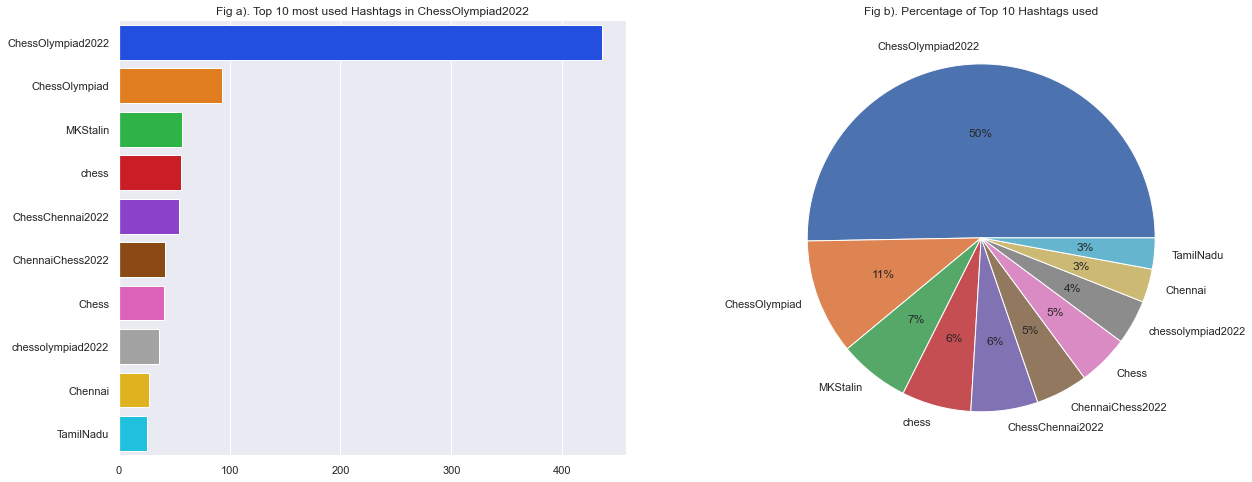

In [357]:
top_10_hashtags = sorted_x[:10]
tags = []
tag_count = []
for i in top_10_hashtags:
    tags.append(i[0])
    tag_count.append(i[1])

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
sns.set(style="darkgrid")
sns.barplot(tag_count, tags, palette='bright')
plt.title("Fig a). Top 10 most used Hashtags in ChessOlympiad2022")

plt.subplot(1, 2, 2)
plt.title("Fig b). Percentage of Top 10 Hashtags used")
plt.pie(tag_count, labels=tags, autopct="%.f%%");

From the above Visualization we can infer that 'ChessOlympiad2022' is most predominantly used Hashtag and its existence is around 50% as it used my majority of users who tweet about chess. It is followed by ChessOlympiad Tag around 11%, and MKStalin (7%) who is the Chief Minsiter of TamilNadu and under his governance all arrangements were made for ChessOlympiad

In [358]:
mention_dict = {}
mention_list = []

for i in final_df['mentions'].value_counts().index:
    for j in i:
        mention_list.append(j)
    
for word in mention_list:
    if word not in mention_dict.keys():
        mention_dict[word]=1
    else:
        mention_dict[word]+=1
        
sorted_x_mention = sorted(mention_dict.items(), key=lambda kv: kv[1], reverse=True)
sorted_dict_mention = collections.OrderedDict(sorted_x_mention)


## Top 20 mentions

Text(0.5, 1.0, 'Top 20 most used mentions')

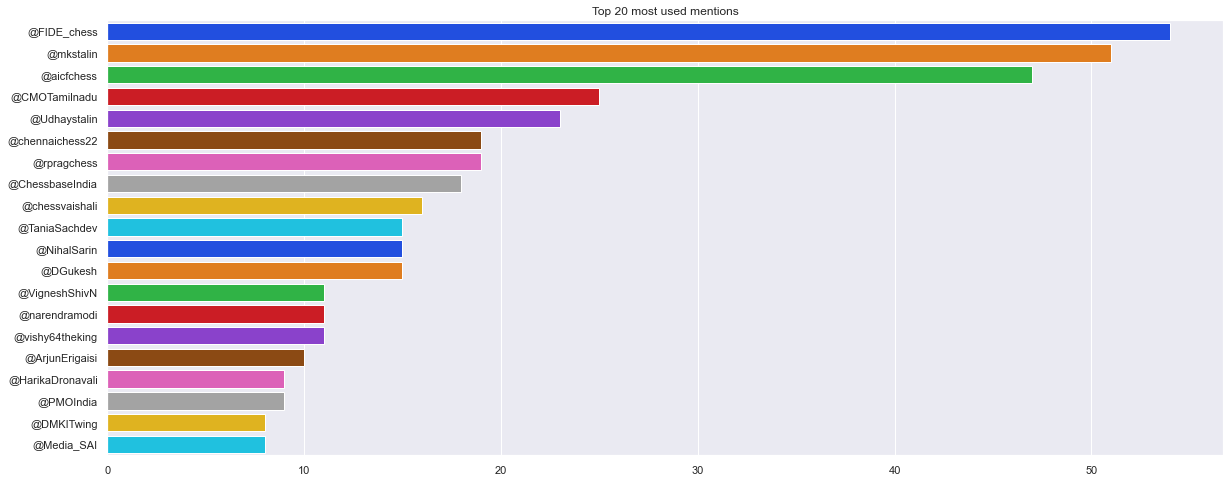

In [359]:
mention_label = []
mention_values = []

for i in sorted_x_mention[:20]:
    mention_label.append(i[0])
    mention_values.append(i[1])

plt.figure(figsize=(20, 8))
sns.barplot(mention_values, mention_label, palette='bright')
plt.title("Top 20 most used mentions")

From the barplot we can infer that @FIDE_chess is most used (The International Chess Federation (FIDE) is the governing body of the sport of chess, and it regulates all international chess competitions), followed by @mkstalin who is the chief minister of Tamil nadu, and @aicfchess (aicfchess which is expanded as  All India Chess Federation is central administrative body for the game of chess in India) these 3 mentios are used more than 45 times

## Reviews with positive sentiments

In [362]:
positive_reviews = final_df.loc[final_df['Sentiment']=='Positive']
reviews_p = ' '.join(positive_reviews['content'])
positive_reviews.head(1)

,id,date,day,month,year,day_of_week,Time,Week,is_leap_year,content,...,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions,negative_score,neutral_score,positive_score,Sentiment
0,1559224756301606912,2022-08-15 17:05:25+00:00,15,8,2022,Monday,17:05:25,33,False,zelenskyyua hey did you thank our pm mr narendramodi for safeguarding ukraines in india and too sending them with gold medal our chief minister of state mr stalin mkstalin also did a fantastic role in,...,1,0,en,Twitter for iPhone,[ChessOlympiad2022],"[@ZelenskyyUa, @mkstalin]",0.003573,0.085103,0.911324,Positive


## Reviews with negative sentiments

In [363]:
negative_reviews = final_df.loc[final_df['Sentiment']=='Negative']
reviews_ne = ' '.join(negative_reviews['content'])
negative_reviews.head(1)

,id,date,day,month,year,day_of_week,Time,Week,is_leap_year,content,...,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions,negative_score,neutral_score,positive_score,Sentiment
27,1558858665159200768,2022-08-14 16:50:42+00:00,14,8,2022,Sunday,16:50:42,32,False,sometimes it s become more difficult to draw the game then winning the game,...,1,0,en,Twitter for Android,"[chess, ChessOlympiad2022, chesschamps, vishwanathananand]",NaN,0.575144,0.394532,0.030324,Negative


## Reviews with neutral sentiments

In [364]:
neutral_reviews = final_df.loc[final_df['Sentiment']=='Neutral']
reviews_nu = ' '.join(neutral_reviews['content'])
neutral_reviews.head(1)

,id,date,day,month,year,day_of_week,Time,Week,is_leap_year,content,...,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions,negative_score,neutral_score,positive_score,Sentiment
3,1559220339116167168,2022-08-15 16:47:52+00:00,15,8,2022,Monday,16:47:52,33,False,full video link,...,3,0,en,Twitter Web App,"[ChessOlympiad2022, ChennaiChess2022, chesschennai2022, chesschennai2022, olympiad2022, chess, GalattaExclusive]",NaN,0.101857,0.735639,0.162503,Neutral


## Unigram Analysis

<AxesSubplot:title={'center':'Top 10 words in positive Dataframe - UNIGRAM ANALYSIS'}>

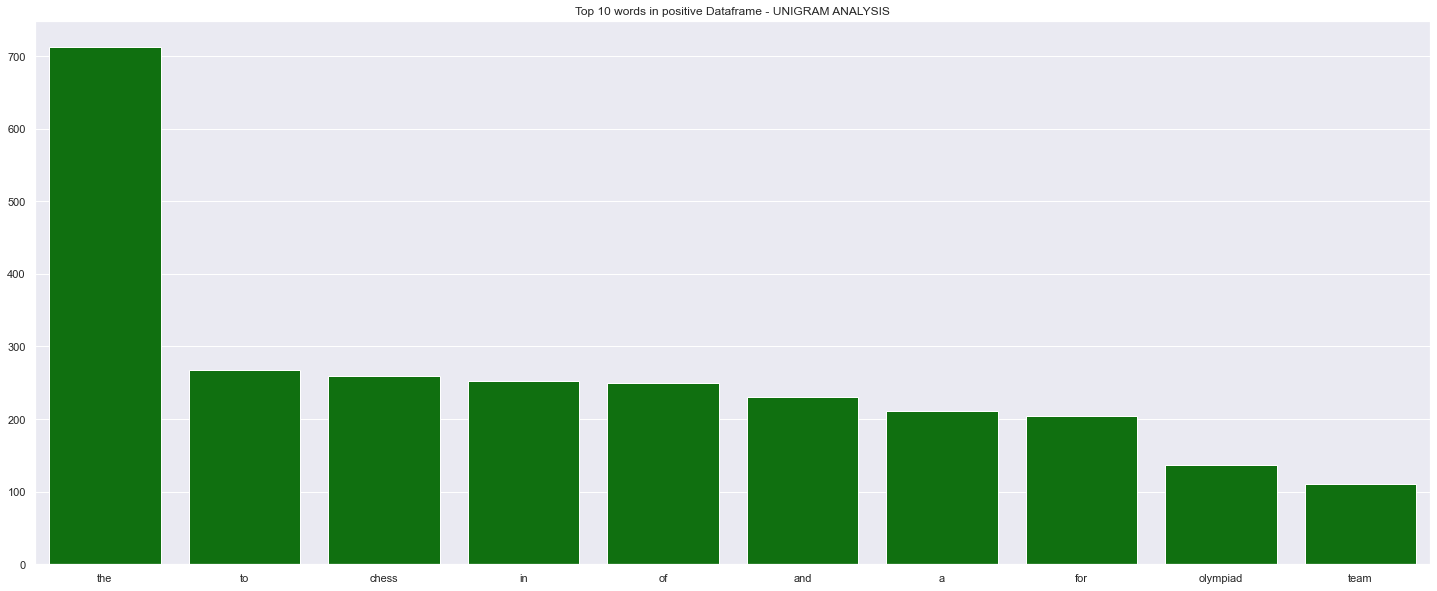

In [388]:
positive_unigram = []
for i in positive_reviews['msg_tokenized']:
    for j in i:
        positive_unigram.append(j)

positive_uni = Counter(positive_unigram)
plt.figure(figsize=(25, 10))
plt.title("Top 10 words in positive Dataframe - UNIGRAM ANALYSIS")
sns.barplot([i[0] for i in positive_uni.most_common(10)],[i[1] for i in positive_uni.most_common(10)], color='green') 
    

<AxesSubplot:title={'center':'Top 10 words in negative Dataframe - UNIGRAM ANALYSIS'}>

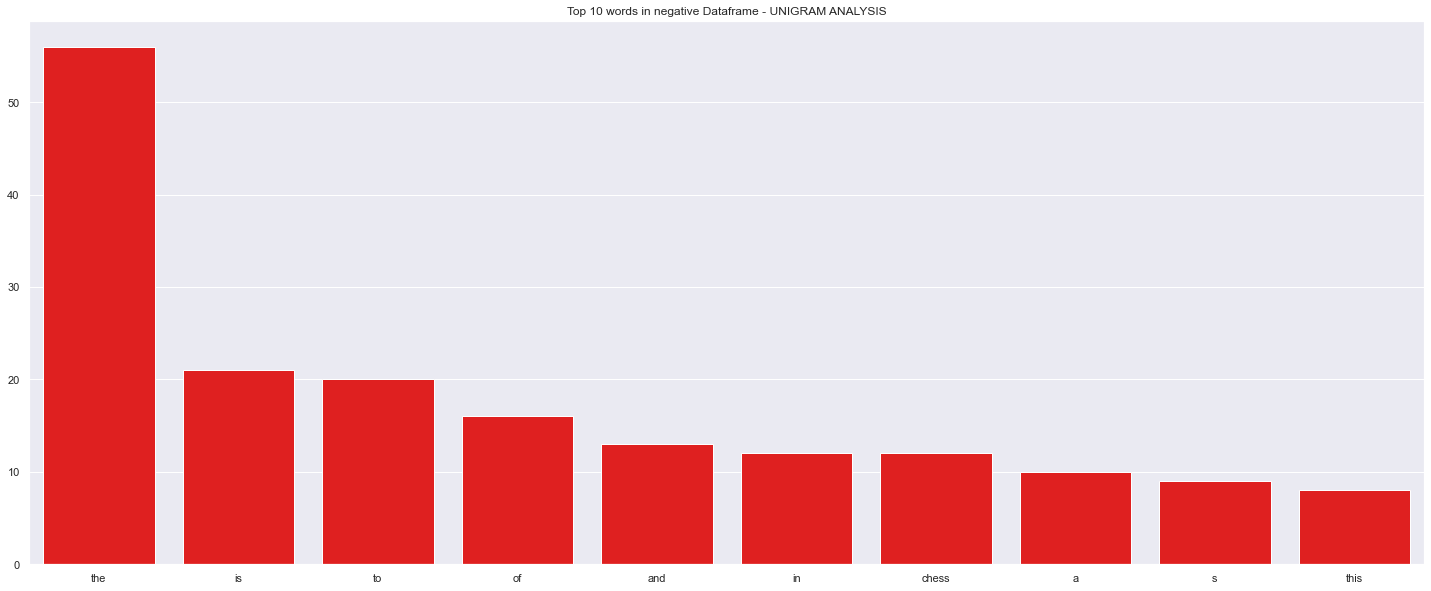

In [389]:
negative_unigram = []
for i in negative_reviews['msg_tokenized']:
    for j in i:
        negative_unigram.append(j)

negative_uni = Counter(negative_unigram)
plt.figure(figsize=(25, 10))
plt.title("Top 10 words in negative Dataframe - UNIGRAM ANALYSIS")
sns.barplot([i[0] for i in negative_uni.most_common(10)],[i[1] for i in negative_uni.most_common(10)], color='red')

<AxesSubplot:title={'center':'Top 10 words in neutral Dataframe - UNIGRAM ANALYSIS'}>

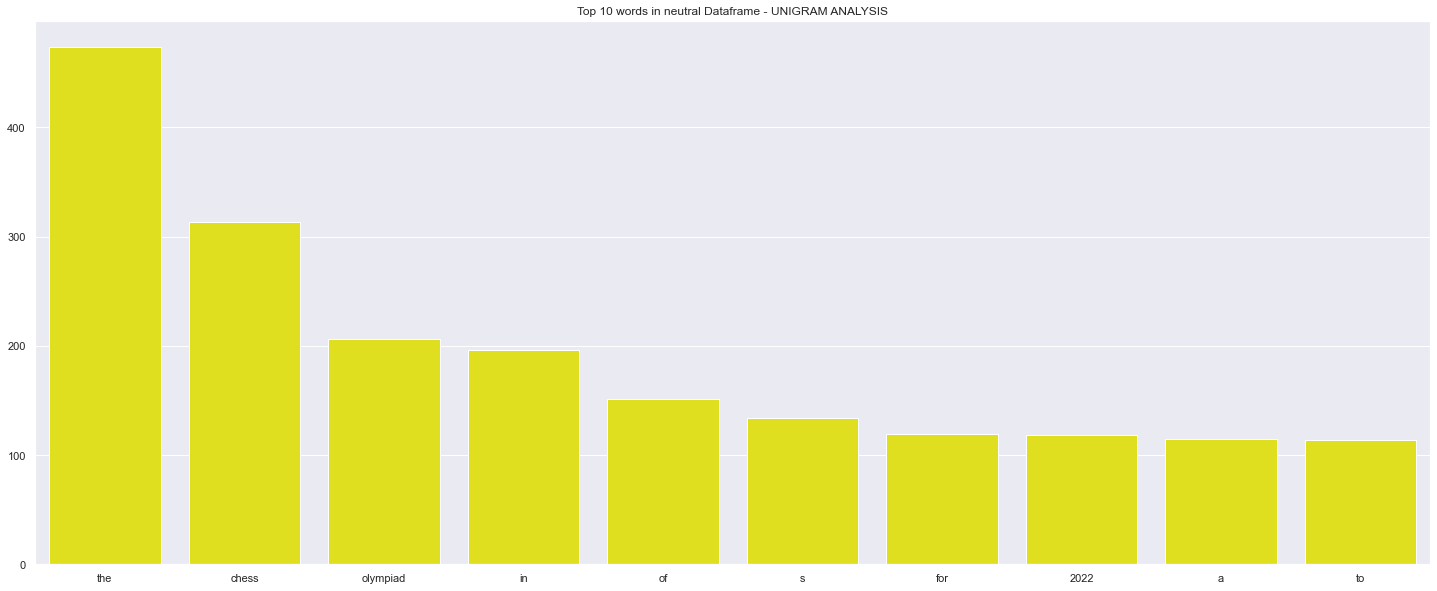

In [391]:
neutral_unigram = []
for i in neutral_reviews['msg_tokenized']:
    for j in i:
        neutral_unigram.append(j)

neutral_uni = Counter(neutral_unigram)
plt.figure(figsize=(25, 10))
plt.title("Top 10 words in neutral Dataframe - UNIGRAM ANALYSIS")
sns.barplot([i[0] for i in neutral_uni.most_common(10)],[i[1] for i in neutral_uni.most_common(10)], color='yellow')

## Bigram Analysis

<AxesSubplot:title={'center':'Top 10 words in positive Dataframe - BIGRAM ANALYSIS'}>

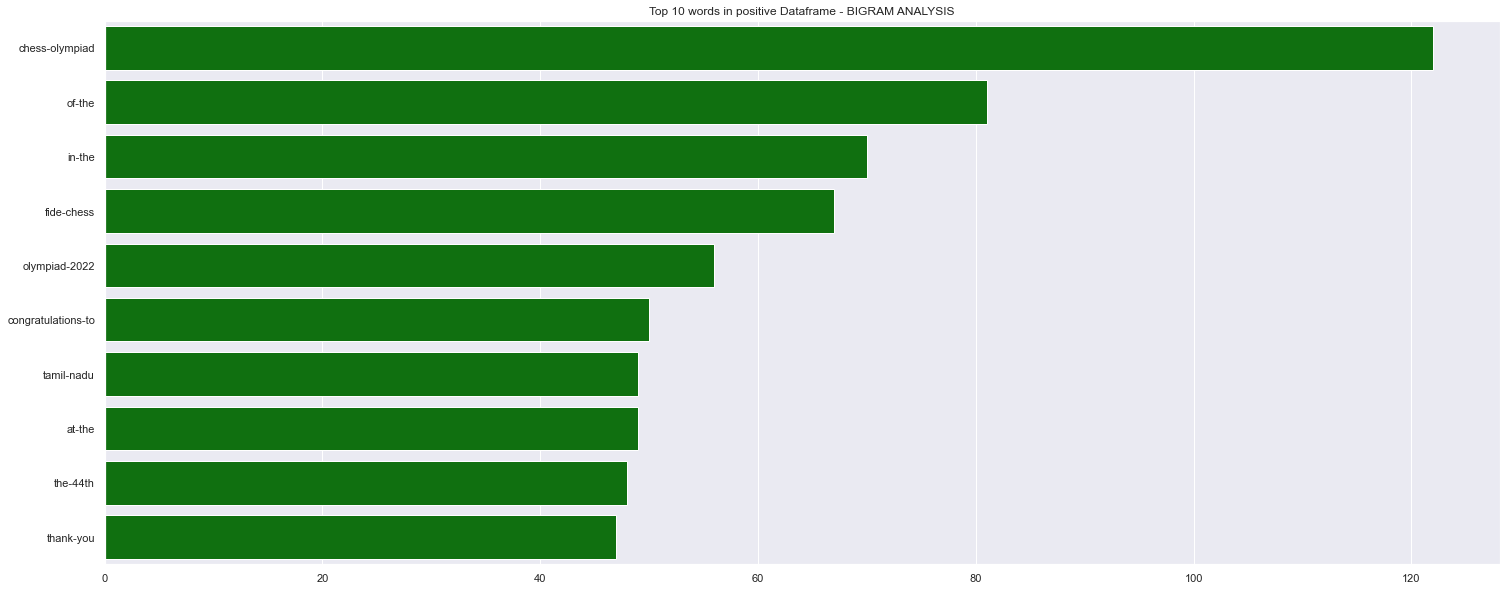

In [459]:
positive_bigram = nltk.bigrams(positive_unigram)

key = []
value = []
for i in nltk.FreqDist(positive_bigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in positive Dataframe - BIGRAM ANALYSIS")
sns.barplot(value, key, color='green')


<AxesSubplot:title={'center':'Top 10 words in Negative Dataframe - BIGRAM ANALYSIS'}>

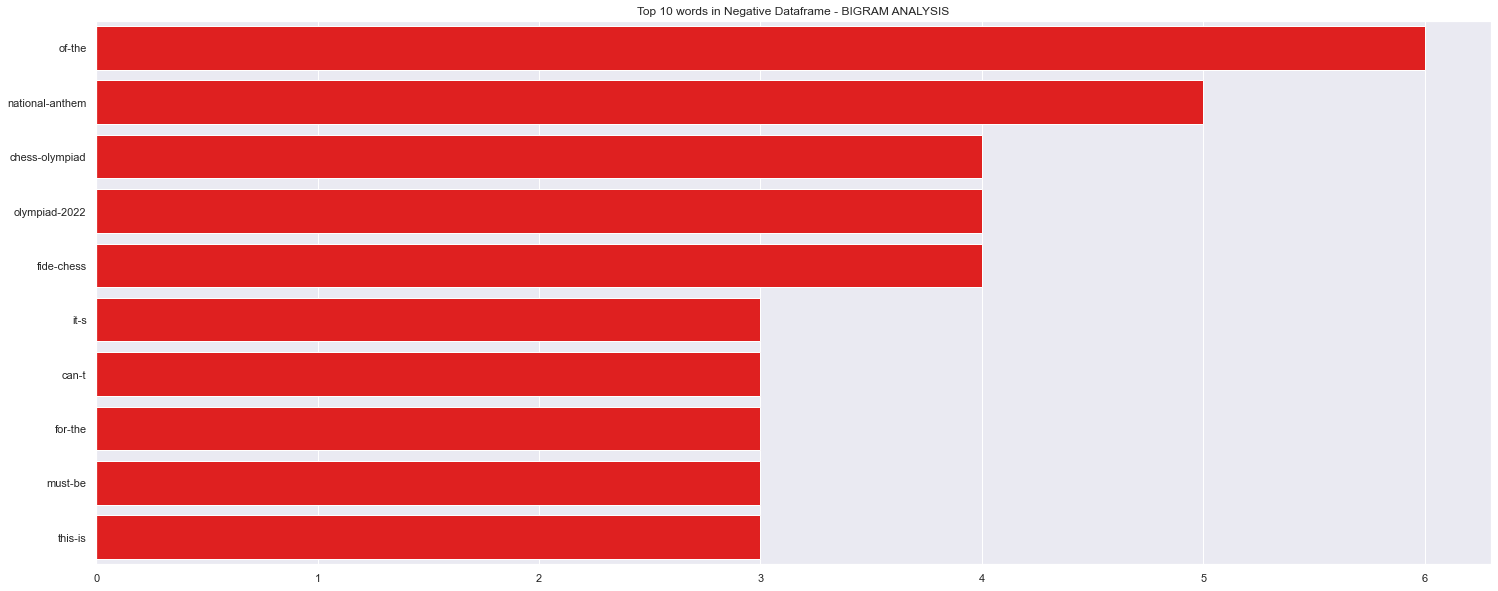

In [460]:
negative_bigram = nltk.bigrams(negative_unigram)

key = []
value = []
for i in nltk.FreqDist(negative_bigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in Negative Dataframe - BIGRAM ANALYSIS")
sns.barplot(value, key, color='red')


<AxesSubplot:title={'center':'Top 10 words in Neutral Dataframe - BIGRAM ANALYSIS'}>

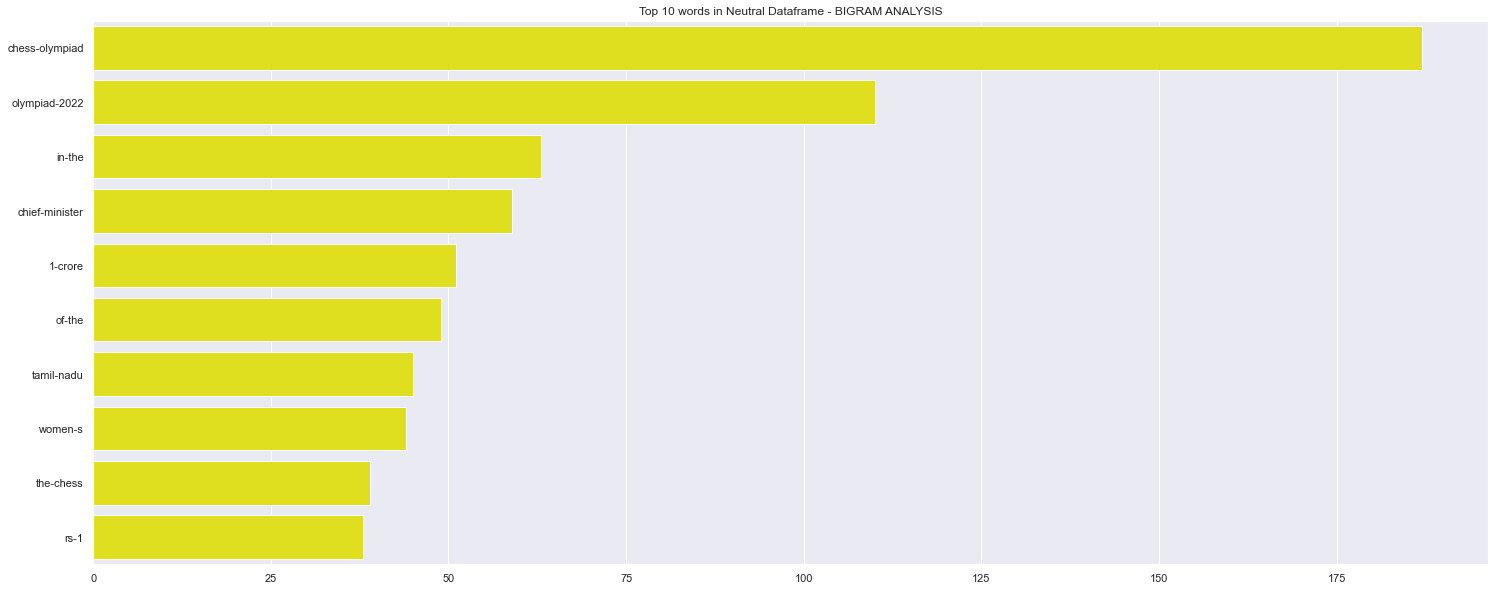

In [461]:
neutral_bigram = nltk.bigrams(neutral_unigram)

key = []
value = []
for i in nltk.FreqDist(neutral_bigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in Neutral Dataframe - BIGRAM ANALYSIS")
sns.barplot(value, key, color='yellow')


## Trigram Analysis

<AxesSubplot:title={'center':'Top 10 words in positive Dataframe - TRIGRAM ANALYSIS'}>

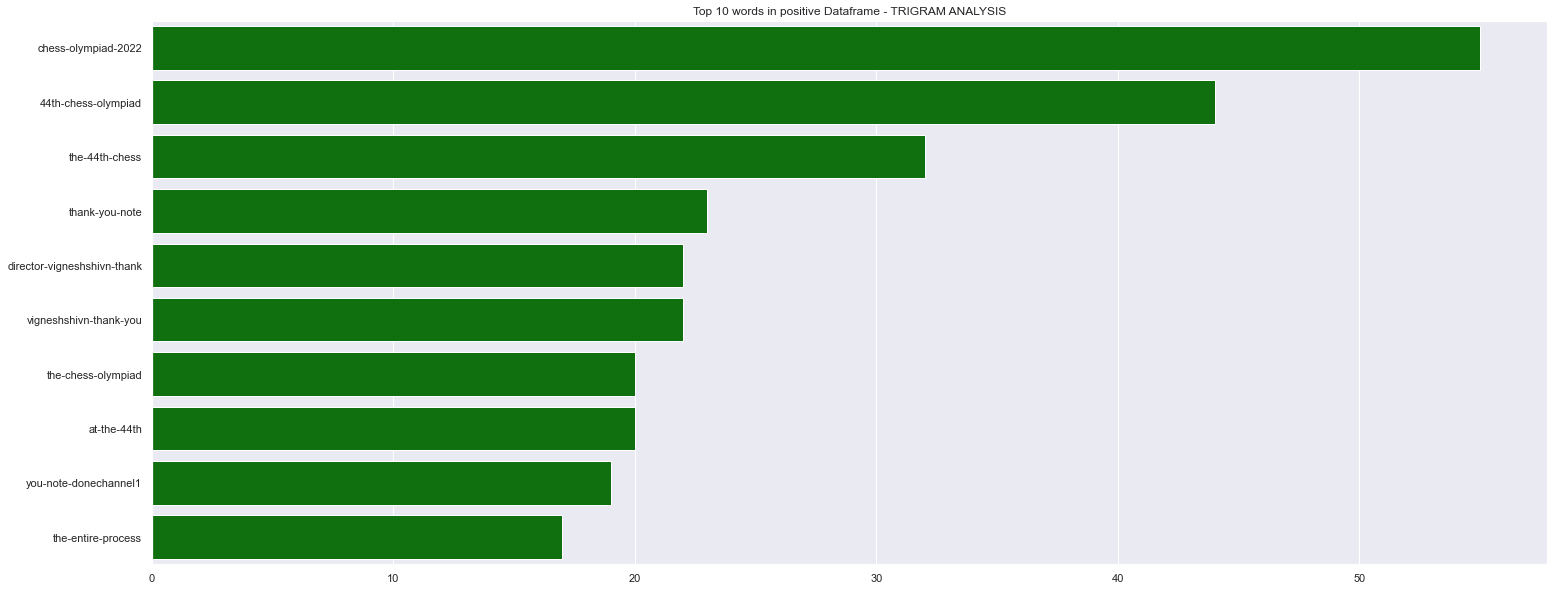

In [466]:
positive_trigram = nltk.trigrams(positive_unigram)

key = []
value = []
for i in nltk.FreqDist(positive_trigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1])+'-'+str(i[0][2]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in positive Dataframe - TRIGRAM ANALYSIS")
sns.barplot(value, key, color='green')

<AxesSubplot:title={'center':'Top 10 words in negative Dataframe - TRIGRAM ANALYSIS'}>

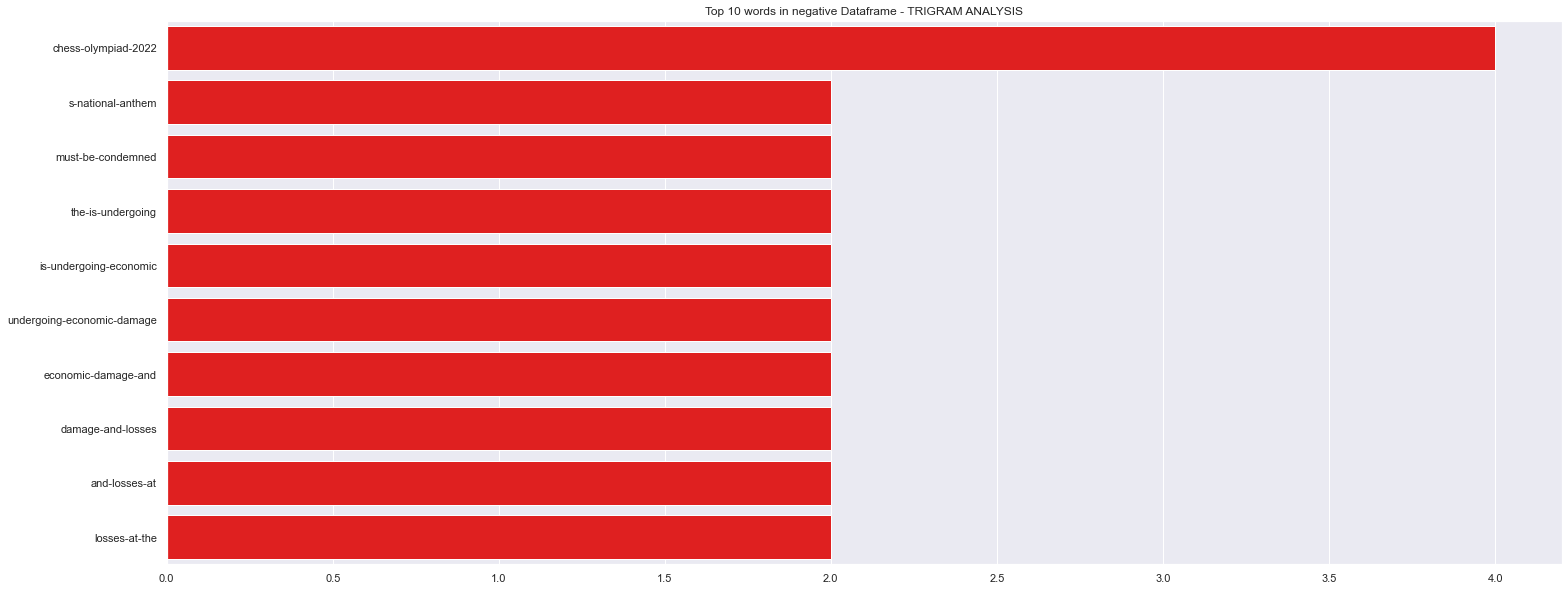

In [467]:
negative_trigram = nltk.trigrams(negative_unigram)

key = []
value = []
for i in nltk.FreqDist(negative_trigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1])+'-'+str(i[0][2]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in negative Dataframe - TRIGRAM ANALYSIS")
sns.barplot(value, key, color='red')

<AxesSubplot:title={'center':'Top 10 words in neutral Dataframe - TRIGRAM ANALYSIS'}>

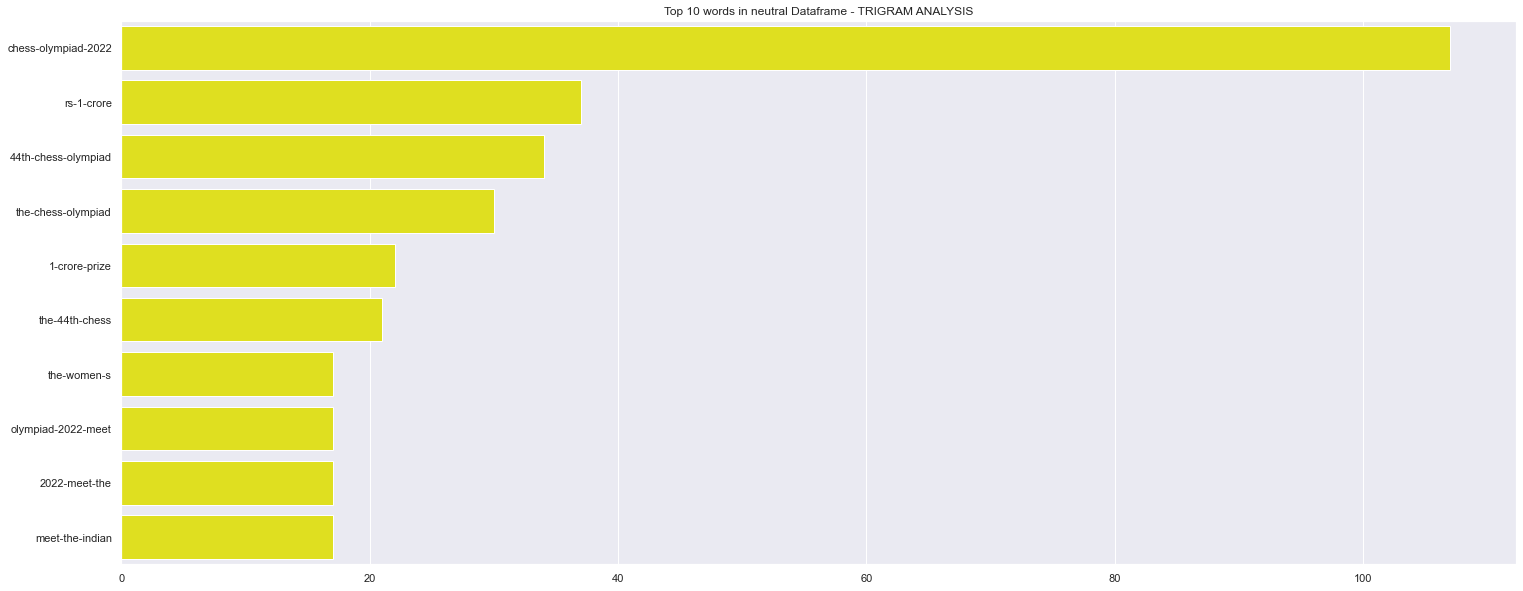

In [468]:
neutral_trigram = nltk.trigrams(neutral_unigram)

key = []
value = []
for i in nltk.FreqDist(neutral_trigram).most_common(10):
    key.append(str(i[0][0])+'-'+str(i[0][1])+'-'+str(i[0][2]))
    value.append(i[1])

plt.figure(figsize=(25, 10))
plt.title("Top 10 words in neutral Dataframe - TRIGRAM ANALYSIS")
sns.barplot(value, key, color='yellow')

### Word cloud for positive, negative and neutral sentiments

Text(0.5, 1.0, 'Negative word cloud')

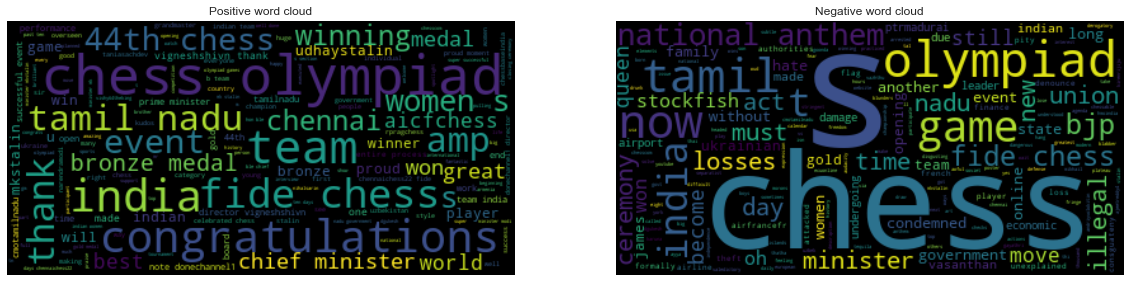

In [469]:
cloud = WordCloud()
sns.set_style('white')
plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
positive_cloud = WordCloud()
positive_cloud = cloud.generate(reviews_p)
plt.imshow(positive_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive word cloud")

plt.subplot(1, 2, 2)
negative_cloud = WordCloud()
negative_cloud = cloud.generate(reviews_ne)
plt.imshow(negative_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative word cloud")


(-0.5, 399.5, 199.5, -0.5)

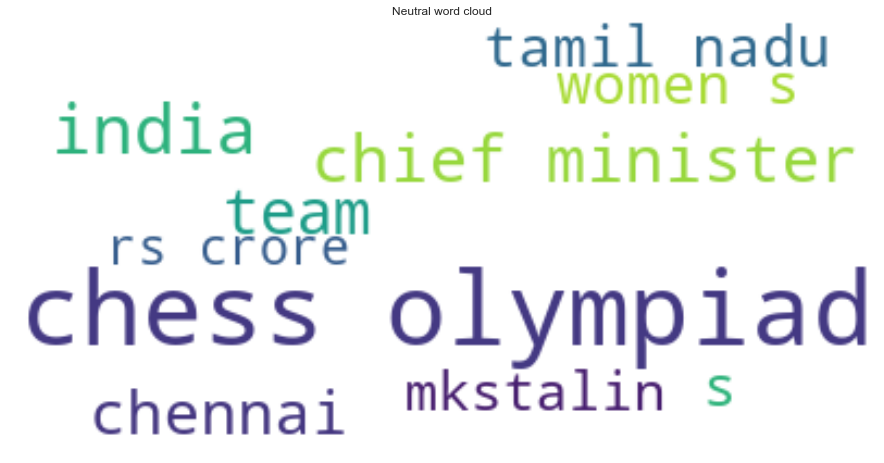

In [470]:
plt.figure(figsize=(20, 8))
wordcloud = WordCloud(max_font_size=50, max_words=10, background_color="white").generate(reviews_nu)
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Neutral word cloud")
plt.axis("off")

## Sentiment types plotting

<AxesSubplot:>

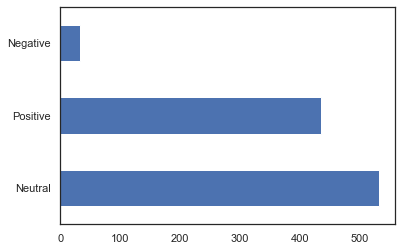

In [471]:
final_df['Sentiment'].value_counts().plot(kind='barh')

From the graph we can infer that Neutral contents are more than positive and negative contents

<AxesSubplot:title={'center':'Sources for tweets'}>

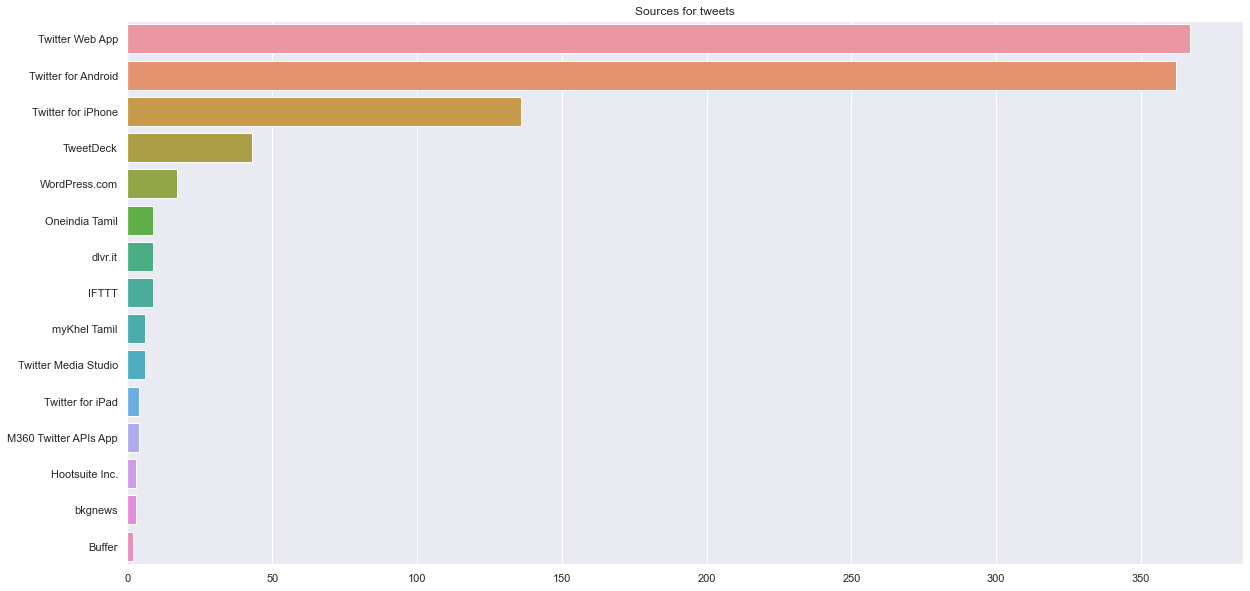

In [475]:
source_label_index = final_df['sourceLabel'].value_counts().index
source_label_values = final_df['sourceLabel'].value_counts().values
plt.figure(figsize=(20, 10))
sns.set_style('darkgrid')
plt.title('Sources for tweets')
sns.barplot(source_label_values[:15], source_label_index[:15])

With respect to twitter labels Twitter web app, Twitter for android, Twitter for iphone are used to tweet more predominantly

In [486]:
final_df[final_df['likeCount']==final_df['likeCount'].max()]

,id,date,day,month,year,day_of_week,Time,Week,is_leap_year,content,...,likeCount,quoteCount,lang,sourceLabel,hashtags,mentions,negative_score,neutral_score,positive_score,Sentiment
502,1557282563084787712,2022-08-10 08:27:50+00:00,10,8,2022,Wednesday,08:27:50,32,False,shine on champs the heroes of the chennai chess olympiad 2022,...,5880,4,en,Twitter for Android,[WhistleForChess],NaN,0.005375,0.452321,0.542304,Positive


Maximum like count is for positive Sentiment ie) 'shine on champs the heroes of the chennai chess olympiad 2022'

In [494]:
print("*****Positive review*****")
print("Maximum like count : ", positive_reviews['likeCount'].max(), "\nMinimum like count :", positive_reviews['likeCount'].min())
print()
print("*****Negative review*****")
print("Maximum like count : ", negative_reviews['likeCount'].max(), "\nMinimum like count :", negative_reviews['likeCount'].min())
print()
print("*****Neutral review*****")
print("Maximum like count : ", neutral_reviews['likeCount'].max(), "\nMinimum like count :", neutral_reviews['likeCount'].min())

*****Positive review*****
Maximum like count :  5880 
Minimum like count : 0

*****Negative review*****
Maximum like count :  835 
Minimum like count : 0

*****Neutral review*****
Maximum like count :  5315 
Minimum like count : 0


It is found that people like to invite more positive tweets than negative ones. So we can see that like for positive tweet
is more than negative and neutral tweet. We can also infer that all three sentiments have 0 likes

# <center>Thank you</center>